# Deutsch Jozsa Algorithm

# Theory
It is a quantum algorithm to determine if a Boolean function is constant or balanced. 

### Step 1: State Initialisation
We first prepare $|\psi_0\rangle =|00\rangle$ by temporal averaging as done in Lab 3. 
Note that those P1 and P2 operators prepare the state in $|11\rangle$ state, so we need to add $X$ gate on both H and C atoms to get `|00>` state.

### Step 2: Execute Algorithm
#### Step 2.1 Apply $U_{1}= Iy(+pi/2)Sy(-pi/2)$
After applying $U_1$ to $|\psi_0\rangle =|00\rangle$, we get:
$$
\begin{aligned} 
|\psi_1\rangle=U_1|\psi_0\rangle= \frac{|0\rangle+|1\rangle}{\sqrt{2}}\otimes\frac{|0\rangle-|1\rangle}{\sqrt{2}}\\
=|00\rangle -|01\rangle +|10\rangle-|11\rangle 
\end{aligned}
$$

#### Step 2.2 Apply $U_{fk}$
Here are the four possible boolean functions for two classical bits

|x|f1(x)|f2(x)|f3(x)|f4(x)|
| :---- | :-: | :-: | :-: | :-:
| 0 | 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 | 0 |

Unitary transform $U_{fk}|x\rangle |y\rangle=|x\rangle |f(x)\oplus y\rangle$. The reason can be seen by writing the qubit state after the unitary transform $|\psi_2\rangle=U_f|\psi_1\rangle$.

$$
\begin{aligned}
|\psi_2\rangle&=\frac{1}{2}\{|0\rangle |0\rangle- |0\rangle |f(0)\oplus1\rangle+|1\rangle |f(1)\rangle-|1\rangle |f(1)\oplus1\rangle\}\\
&=\frac{1}{2}\{ (-1)^{f(0)} |0\rangle(|0\rangle-|1\rangle)+(-1)^{f(1)} |1\rangle(|0\rangle-|1\rangle)\}\\
&=\frac{(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle}{\sqrt{2}}\otimes\frac{|0\rangle-|1\rangle}{\sqrt{2}}
\end{aligned}
$$

#### Step 2.3 Apply $U_{3}=Iy(-pi/2)Sy(+pi/2)$
Finally, we invert the initial rotations using $U_{3}=Iy(-pi/2)Sy(+pi/2)$
$$

\begin{aligned}
|\psi_3\rangle&=U_3|\psi_2\rangle\\
&= \frac{1}{2}\{(-1)^{f(0)}(|0\rangle-|1\rangle)+(-1)^{f(1)}(|0\rangle+|1\rangle)\}\otimes |0\rangle\\
&= \frac{1}{2} \{((-1)^{f(0)}+(-1)^{f(1)})|0\rangle+(-(-1)^{f(0)}+(-1)^{f(1)})|1\rangle\}\otimes |0\rangle
\end{aligned}
$$

### Step 3: Verify Deutsch Jozsa(DJ) Algorithm

### Case 1: Function is constant: f(0)=f(1)
- Putting $f(0)=f(1)$ in $|\psi_3\rangle$, we get $|\psi_3\rangle= |00\rangle$
- Therefore we should observe same spectra for $U_{f1}$ and $U_{f2}$, which would be different from spectra of $U_{f3}$ and $U_{f4}$.

### Case 2: Function is balanced: f(0)!=f(1)
- Putting $f(0)=(1-f(1))$ in $|\psi_3\rangle$, we get $|\psi_3\rangle= |10\rangle$
- Therefore we should observe same spectra for $U_{f3}$ and $U_{f4}$, which would be different from spectra of $U_{f1}$ and $U_{f2}$.

# Running the Simulation

In [1]:
from Algorithm import Algorithm
from PulseSequence import PulseSequence
from Pulse import Pulse
from HamiltonianOperator import *
from Gate import *

import numpy as np
import matplotlib.pyplot as plt

## Step 1: State Initialization

In [2]:
pho_th = qt.Qobj(np.diag([1, 0.6, -0.6, -1]), dims=([[2, 2], [2, 2]]))
pho_th

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.   0.   0.   0. ]
 [ 0.   0.6  0.   0. ]
 [ 0.   0.  -0.6  0. ]
 [ 0.   0.   0.  -1. ]]

### Step 1.1: Temporal Averaging
By doing a temporal averaging, ie summing all the resulting density matrices $\Sigma_{i=0}^{2} P_{i}*pho_th*P_{i}.dag()$, and using the $P_0=I$(do noting), $P_1$ and $P_2$ pulse sequence from the lab 3, we can see that we get |11> state.

In [3]:
ta = Algorithm("Temporal Averaging")

ta.print_sequences()
print("\n")

correction_ta = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))

ta.print_net_density_matrix(correction_ta)

 Temporal Averaging P0 Pulse Sequence: 

Temporal Averaging P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2)

Temporal Averaging P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2)

Resulting Density Matrix obtained after Temporal Averaging for Temporal Averaging algorithm and matrix correction

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         -1.33333333]]


### Step 1.2: Prep |00> by Temporal Averaging
By applying $X_i.X_s$ pulse after all $P_0, P_1 and P_2$ operators and doing temporal averaging, ie summing all the resulting density matrices $\Sigma_{i=0}^{2} P_{i}*pho_th*P_{i}.dag()$, we get $|00\rangle$ state. Here is the relevant snippet from `Algorithm` class.

```python
def state_prep(self, state):
        if state=="00":
            self._p0.add(X_i).add(X_s)
            self._p1.add(X_i).add(X_s)
            self._p2.add(X_i).add(X_s)
            return self
        # Continued...
```

In [4]:
init_00 = Algorithm("State Prep: |00>").state_prep("00")

init_00.print_sequences()
print("\n")

correction_init_00 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))

init_00.print_net_density_matrix(correction_init_00)

 State Prep: |00> P0 Pulse Sequence: Ix(pi) -> Sx(pi)

State Prep: |00> P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi)

State Prep: |00> P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(pi) -> Sx(pi)

Resulting Density Matrix obtained after Temporal Averaging for State Prep: |00> algorithm and matrix correction

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.33333333  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


## Step 2 : Execute Deutsch Jozsa Algorithm
Reference: `MIT-QCwithNMRlab.pdf` and `NMR_Lab_4.pdf`

### Interpreting the code outputs and plots
My code outputs the exact pulse sequences for $P_0$, $P_1$ and $P_2$ permutation operators. This means that I am printing out the full DJ sequence for P0, P1 and P2 run. Similar case is with my plots as well which print out the resulting spectrum.

### 2A : f1=0, constant function

In [5]:
f1 = PulseSequence("f1")

 Deutsch Jozsa -- Uf1 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf1 P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf1 P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Iy(-pi/2) -> Sy(+pi/2)



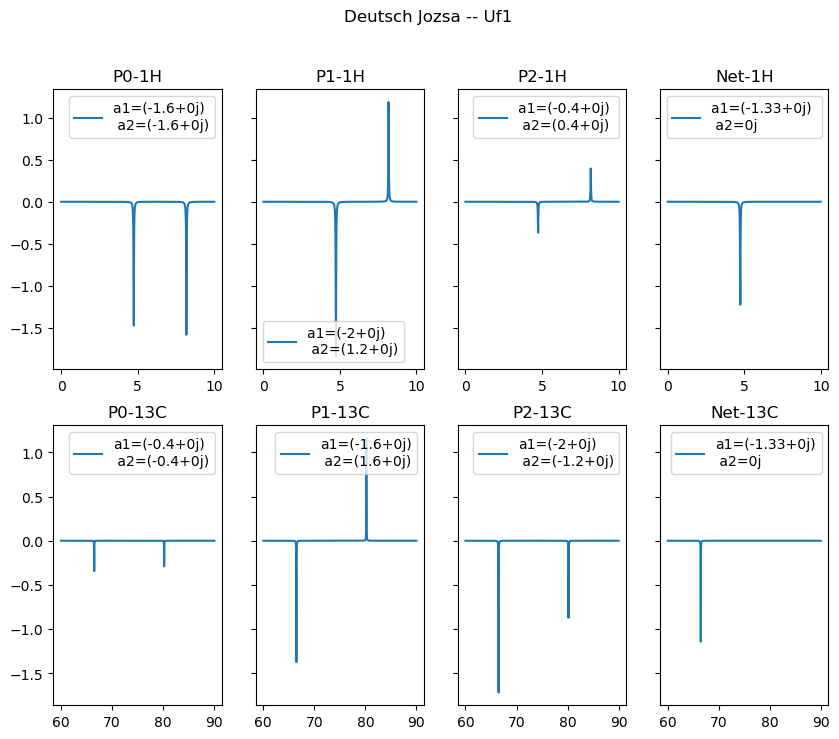

In [6]:
dj_f1 = Algorithm("Deutsch Jozsa -- Uf1")
dj_f1\
    .state_prep("00")\
    .add_pulse(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
    .add_pulse(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add_sequence(f1)\
    .add_pulse(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add_pulse(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\

correction_dj_f1 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))

# plt.figure(figsize=(10,10))
dj_f1.print_sequences()
print("\n")
dj_f1.execute_algorithm(correction_dj_f1)

## 2B: f1=1, constant function

In [7]:
f2 = PulseSequence("f2").add(X_s)

 Deutsch Jozsa -- Uf2 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sx(pi) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf2 P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sx(pi) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf2 P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sx(pi) -> Iy(-pi/2) -> Sy(+pi/2)



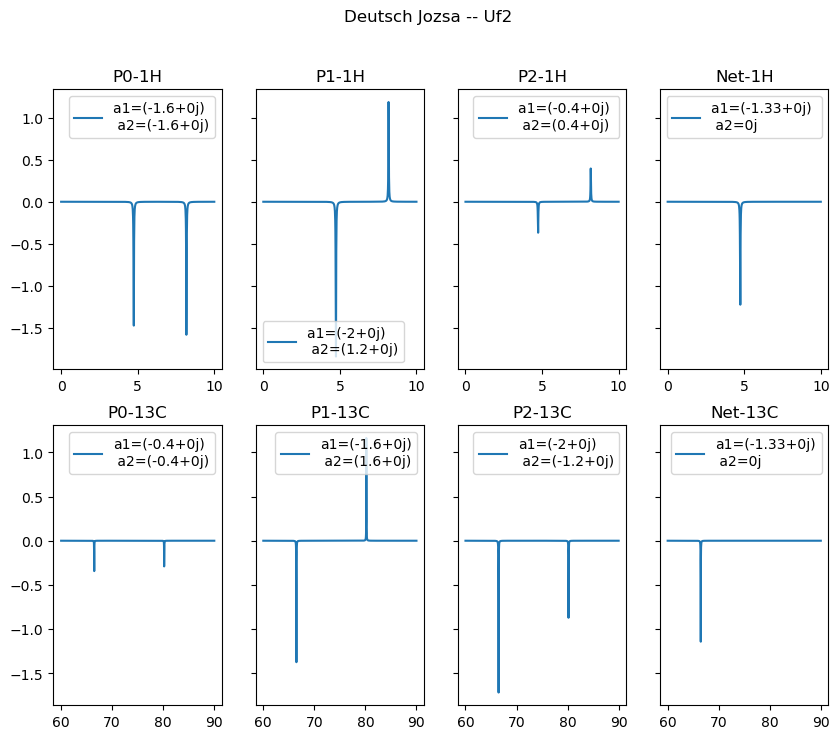

In [8]:
dj_f2 = Algorithm("Deutsch Jozsa -- Uf2")
dj_f2\
    .state_prep("00")\
    .add_pulse(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
    .add_pulse(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add_sequence(f2)\
    .add_pulse(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add_pulse(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\

correction_dj_f2 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))


dj_f2.print_sequences()
print("\n")
dj_f2.execute_algorithm(correction_dj_f2)

In [9]:
f3 = PulseSequence("f3").add_seq(cx)

 Deutsch Jozsa -- Uf3 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf3 P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf3 P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Iy(-pi/2) -> Sy(+pi/2)



<Figure size 1000x1000 with 0 Axes>

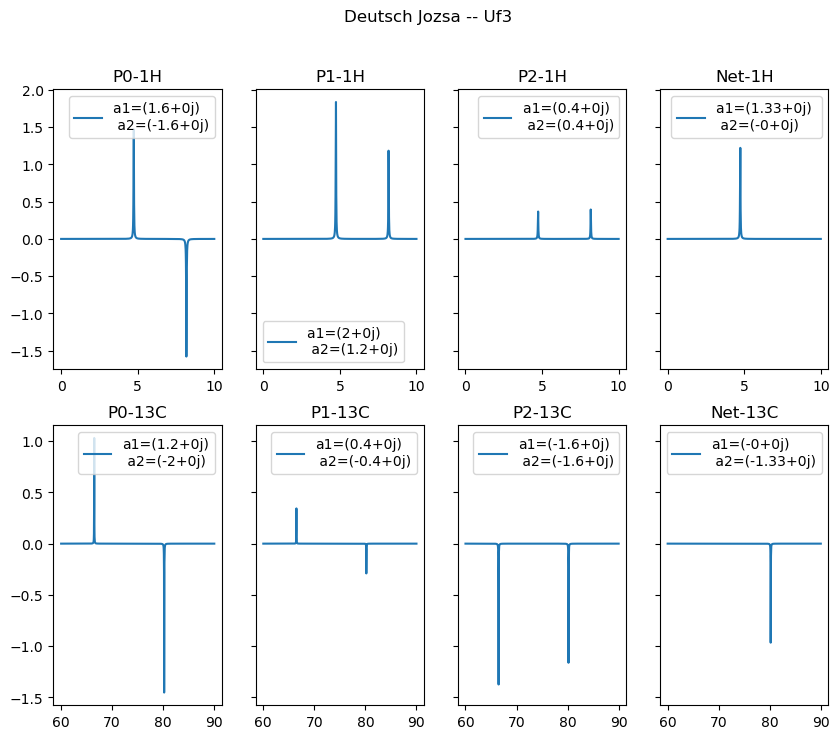

In [10]:
dj_f3 = Algorithm("Deutsch Jozsa -- Uf3")
dj_f3\
    .state_prep("00")\
    .add_pulse(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
    .add_pulse(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add_sequence(f3)\
    .add_pulse(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add_pulse(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\

# correction_dj_f3 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))


plt.figure(figsize=(10,10))
dj_f3.print_sequences()
print("\n")
dj_f3.execute_algorithm()

In [11]:
f4 = PulseSequence("f4")\
    .add(X_i)\
    .add_seq(cx)\
    .add(X_i)

 Deutsch Jozsa -- Uf4 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Ix(pi) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Ix(pi) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf4 P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Ix(pi) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Ix(pi) -> Iy(-pi/2) -> Sy(+pi/2)

Deutsch Jozsa -- Uf4 P2 Pulse Sequence: Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sx(+pi/2) -> Iy(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Sy(-pi/2) -> Ix(pi) -> Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2) -> Ix(pi) -> Iy(-pi/2) -> Sy(+pi/2)



<Figure size 1000x1000 with 0 Axes>

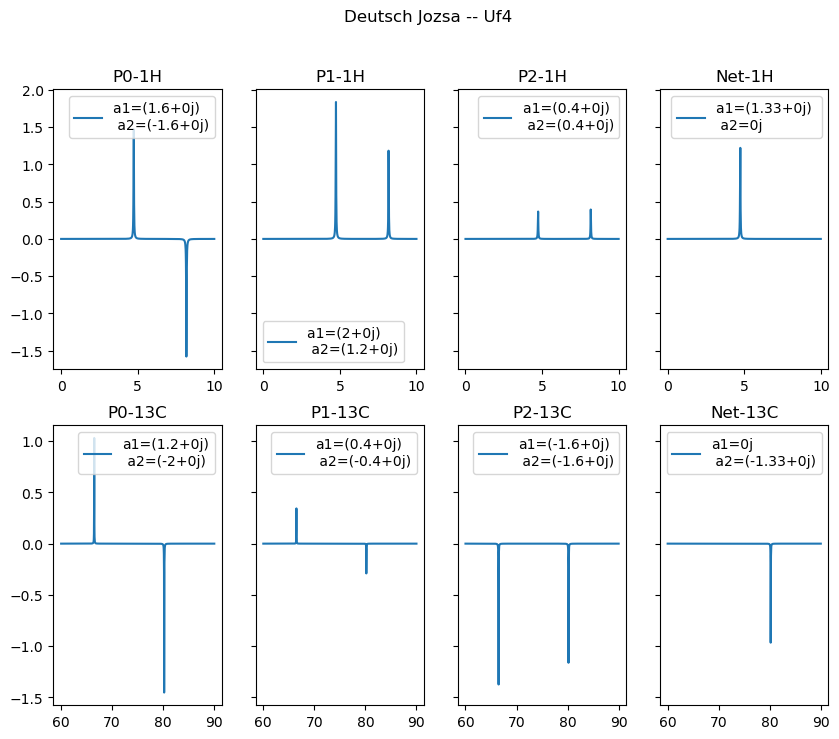

In [12]:
dj_f4 = Algorithm("Deutsch Jozsa -- Uf4")
dj_f4\
    .state_prep("00")\
    .add_pulse(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
    .add_pulse(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add_sequence(f4)\
    .add_pulse(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add_pulse(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\

correction_dj_f4 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))

plt.figure(figsize=(10,10))
dj_f4.print_sequences()
print("\n")
dj_f4.execute_algorithm(correction_dj_f4)

## Step 3: Verify Deutsch Jozsa(DJ) Algorithm

### Case 1: Function is constant: f(0)=f(1)
- From above simulations, we get $\rho = |00\rangle\langle 00|$, as expected.
- Also, we observe same spectra for $U_{f1}$ and $U_{f2}$, which is different from spectra of $U_{f3}$ and $U_{f4}$.

### Case 2: Function is balanced: f(0)!=f(1)
- From above simulations, we get $\rho = |11\rangle\langle 11|$ as expected.
- Also, we observe same spectra for $U_{f3}$ and $U_{f4}$, which is different from spectra of $U_{f1}$ and $U_{f2}$.